In [6]:
import numpy as np
import matplotlib.pyplot as plt
from exp.SVI import SVI
from exp.SVI_CV import SVI_CV

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Logistic regression on Sonar

In [7]:
# Naive estimator
runner = SVI(
    model_dir='models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
print(runner.param_template)
_, losses, _ = runner.run(num_iters=5000, step_size=1e-4, batch_size=5, opt='sgd')

{'w': Array([-1.9708247 , -1.9164352 ,  0.325706  , -0.55264807, -1.1078491 ,
       -1.5228467 , -1.4982443 ,  0.46731997, -1.6199708 ,  1.9336901 ,
       -0.30071163,  1.3299203 , -1.6135516 , -1.0919166 ], dtype=float32)}


In [4]:
# JointCV estimator
runner = SVI_CV(
    model_dir='models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, lossesCV, _ = runner.run(num_iters=5000, step_size=1e-4, batch_size=5, opt='sgd')

[[-7.74202271e+02  5.11149872e+02 -1.75326477e+03  2.00544080e+03
   1.03020007e+03 -1.87131580e+03  3.24490845e+02  1.17633679e+03
   9.73920593e+02  5.51898560e+02 -1.22521008e+03 -2.65897064e+02
   1.20241968e+03  2.17696014e+02]
 [ 8.32623291e+02 -8.24552124e+02 -4.91518982e+02  6.55727783e+02
  -2.09259668e+03 -2.24519604e+03  8.19980469e+02 -1.26749219e+03
  -1.04225134e+03 -6.00339722e+02 -1.11289185e+03  2.88955414e+02
  -1.68997803e+02 -2.28728638e+02]
 [ 6.87281799e+00 -7.94305420e+00 -1.07895355e+01  4.76669312e+00
   1.57159042e+00 -6.80532837e+00 -7.78475952e+00 -1.16041565e+01
  -6.13702393e+00 -8.20245361e+00  8.55206299e+00 -2.85371094e+01
   5.10110474e+00 -2.44705200e-01]
 [ 7.69916077e+02  2.81478668e+02 -8.28447510e+02 -2.88306458e+02
   7.73724487e+02  1.81018936e+02  1.91134308e+02  5.53816772e+02
   4.60338257e+02  2.58387238e+02 -5.78678223e+02 -1.24558701e+02
   1.20816450e+01 -2.89964342e+00]
 [-1.24342517e+03 -8.79667358e+02 -6.35548340e+02 -9.80876526e+02
  

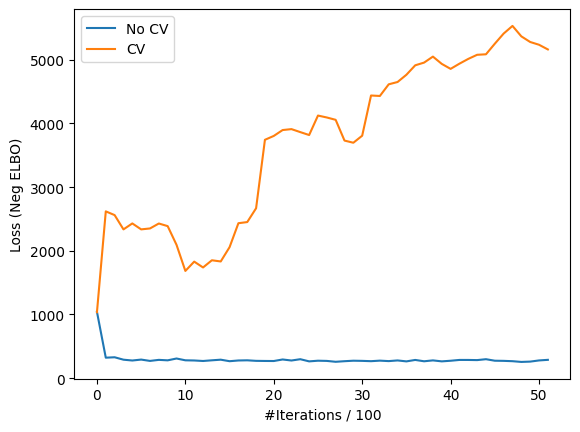

In [21]:
plt.plot(losses, label='No CV')
plt.plot(lossesCV, label='CV')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
# plt.ylim(top=400, bottom=225)

## MovieLens (subset)

In [10]:
# Have a peek of the data
data_tiny = np.load('models/MovieLens/tiny.npz')
print("Tiny subset size:", data_tiny['X'].shape)

data_full = np.load('models/MovieLens/full.npz')
print("Full dataset size:", data_full['X'].shape)

Tiny subset size: (500, 18)
Full dataset size: (100000, 18)


In [11]:
# Naive estimator
runner = SVI(
    model_dir='models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, losses, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

In [12]:
# Naive estimator
runner = SVI_CV(
    model_dir='models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, lossesJCV, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

[autoreload of  failed: Traceback (most recent call last):
  File "/Users/stevenxue/anaconda3/envs/vi/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/stevenxue/anaconda3/envs/vi/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Users/stevenxue/anaconda3/envs/vi/lib/python3.13/importlib/__init__.py", line 128, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module ''
]


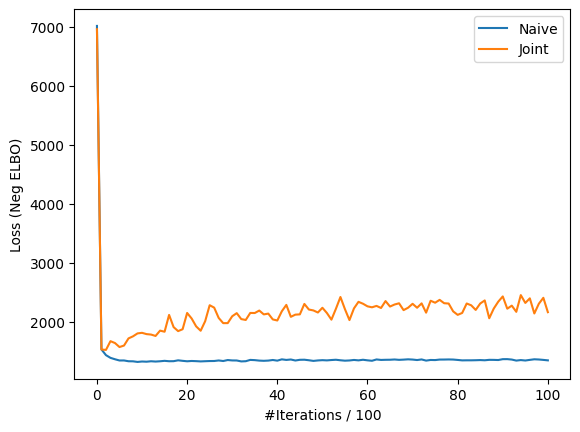

In [13]:
plt.plot(losses, label='No CV')
plt.plot(lossesJCV, label='CV')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
# plt.ylim(top=1400, bottom=1280)